<a href="https://colab.research.google.com/github/danangdb/ml_project1/blob/main/Final_Project_Intro_to_ML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score

### Import Dataset from google drive

In [2]:
#import data from google drive
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
# Load Data Set
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
df = pd.read_csv('/content/gdrive/MyDrive/Data Science/dataset/housing.csv', delim_whitespace=True, names=col_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# Cek missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
#Cek jumlah data
df.shape


(506, 14)

In [6]:
# Cek sebaran data
df.describe().T


,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


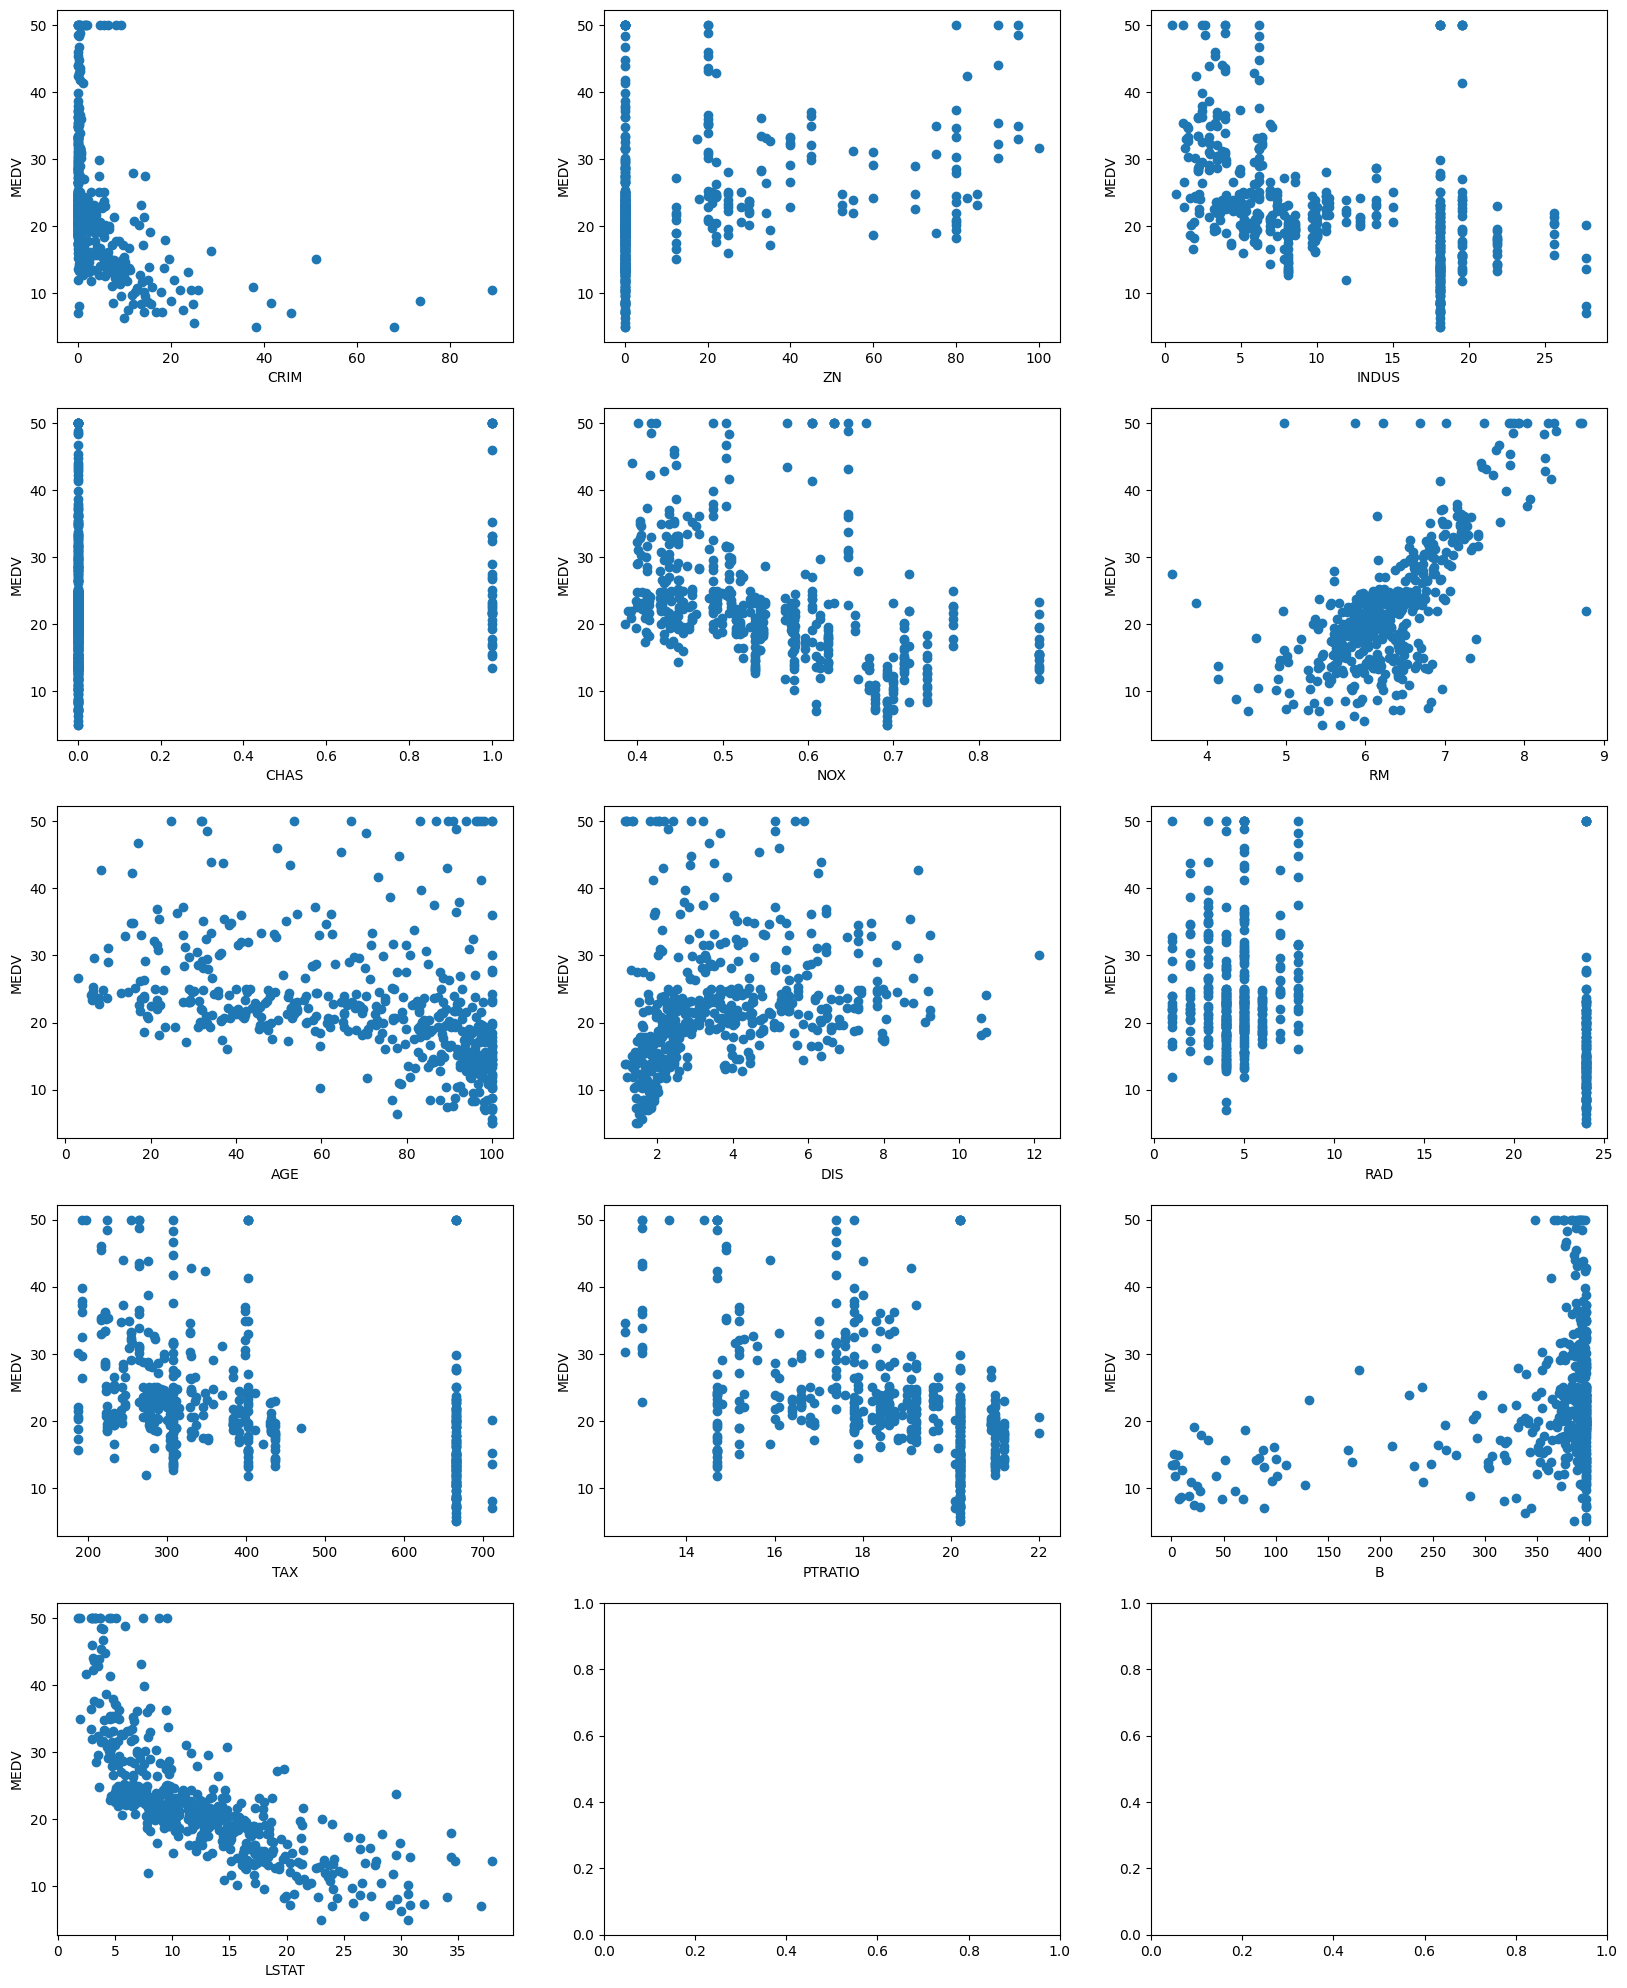

In [7]:
# buat figure dan axis
fig, axs = plt.subplots(5, 3, figsize=(20, 25))
axs = axs.ravel()

# Plot untuk masing2 figure
for i, column in enumerate(df.columns[:-1]):
    axs[i].scatter(df[column], df["MEDV"])
    #axs[i].set_title(column)
    axs[i].set_xlabel(column)
    axs[i].set_ylabel("MEDV")
    
    # calculate the slope and intercept of the line of best fit
    #slope, intercept = np.polyfit(df[column], df["MEDV"], 1)
    #x = np.linspace(df[column].min(), df[column].max(), 100)
    #y = slope * x + intercept
    
    # plot the line of best fit
    #axs[i].plot(x, y, '-r')
    
plt.show()

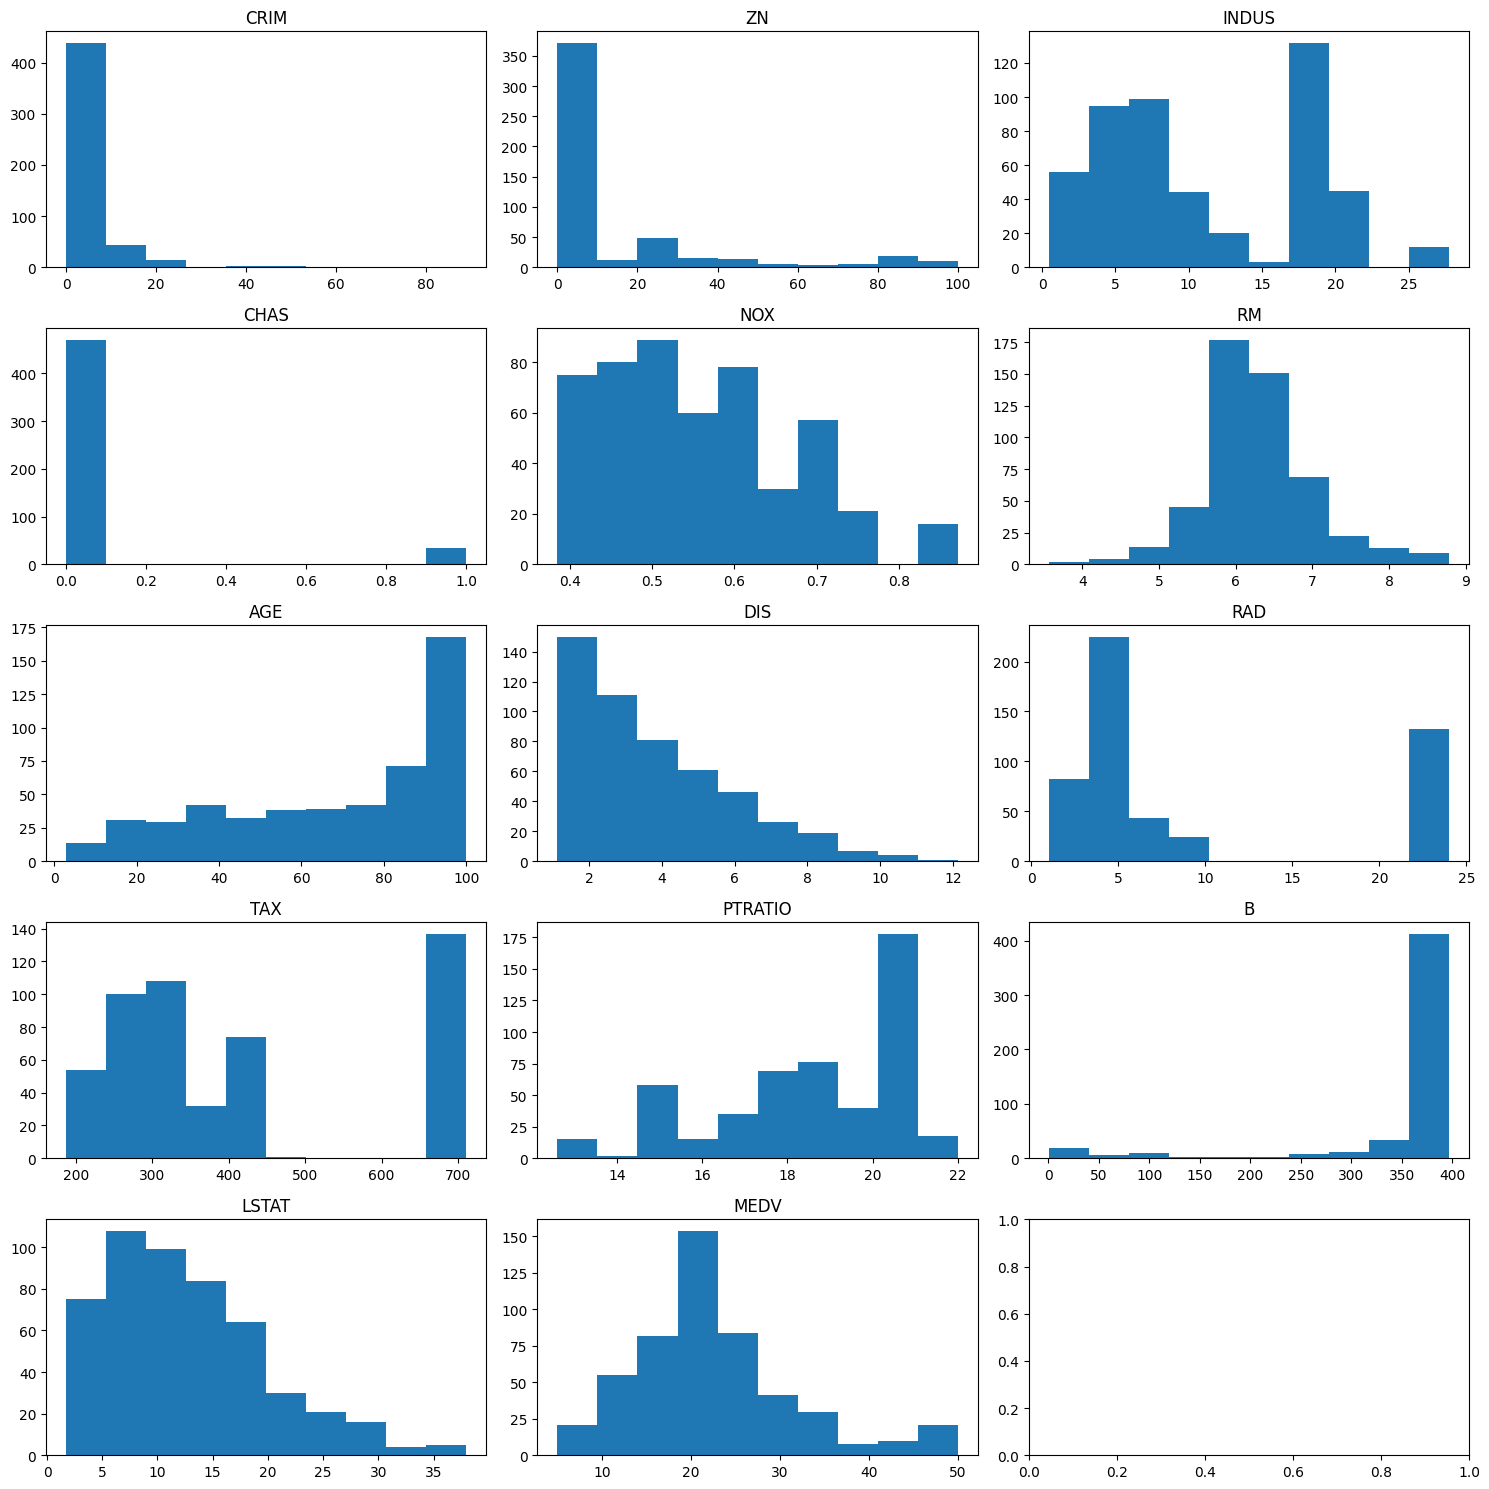

In [8]:
# cek distribusi data masing-masing variabel
fig, axs = plt.subplots(5, 3, figsize=(15, 15))
axs = axs.ravel()

# Plot untuk masing-masing histogram
for i, feature in enumerate(df.columns):
    axs[i].hist(df[feature])
    axs[i].set_title(feature)
    
plt.tight_layout()
plt.show()

**Split Input-Output Data**

In [9]:
# Buat input dan output
def split_input_output(data, target_column):
  X = data.drop(columns = target_column)
  y = data[target_column]
  return X,y

X,y = split_input_output(data = df,
                         target_column = "MEDV")

In [10]:
# Cek sanity data
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [11]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

**Split Train dan Test**

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state = 123)

In [14]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
203,0.03510,95.0,2.68,0,0.4161,7.853,33.2,5.1180,4,224.0,14.7,392.78,3.81
441,9.72418,0.0,18.10,0,0.7400,6.406,97.2,2.0651,24,666.0,20.2,385.96,19.52
172,0.13914,0.0,4.05,0,0.5100,5.572,88.5,2.5961,5,296.0,16.6,396.90,14.69
95,0.12204,0.0,2.89,0,0.4450,6.625,57.8,3.4952,2,276.0,18.0,357.98,6.65
54,0.01360,75.0,4.00,0,0.4100,5.888,47.6,7.3197,3,469.0,21.1,396.90,14.80


**Standarisasi**

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(X_train)

StandardScaler()

In [18]:
X_train_clean = scaler.transform(X_train)
X_train_clean = pd.DataFrame(X_train_clean,
                             columns = X_train.columns,
                             index = X_train.index)


In [19]:
X_test_clean = scaler.transform(X_test)
X_test_clean = pd.DataFrame(X_test_clean,
                             columns = X_test.columns,
                             index = X_test.index)

In [20]:
X_train_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,404.0,-1.209154e-17,1.00124,-0.404428,-0.395811,-0.376350,0.014333,9.731866
ZN,404.0,3.517538e-17,1.00124,-0.486534,-0.486534,-0.486534,0.058255,3.871774
INDUS,404.0,1.758769e-16,1.00124,-1.545933,-0.873121,-0.216157,0.995482,2.384328
CHAS,404.0,4.836615e-17,1.00124,-0.245698,-0.245698,-0.245698,-0.245698,4.070039
NOX,404.0,2.638154e-17,1.00124,-1.466553,-0.890187,-0.150373,0.589441,2.714254
RM,404.0,-2.054462e-15,1.00124,-3.864583,-0.559552,-0.113886,0.475601,3.470619
AGE,404.0,1.055261e-16,1.00124,-2.250169,-0.845030,0.311774,0.897770,1.108585
DIS,404.0,1.143200e-16,1.00124,-1.225600,-0.791038,-0.320931,0.623229,3.905795
RAD,404.0,1.055261e-16,1.00124,-0.983728,-0.636934,-0.521336,1.675027,1.675027
TAX,404.0,-1.494954e-16,1.00124,-1.315847,-0.769176,-0.466130,1.530409,1.797803


In [21]:
X_test_clean.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
410,5.420728,-0.486534,0.995482,-0.245698,0.357173,-0.745275,1.108585,-1.111381,1.675027,1.530409,0.808919,-3.872802,-0.381428
85,-0.398615,-0.486534,-0.965327,-0.245698,-0.915994,0.494777,-0.460024,0.305098,-0.752532,-0.959322,0.016838,0.383239,-0.884316


**Menentukan baseline model**
- Baseline model regresi adalah rata-rata target

In [22]:
baseline_pred = np.mean(y_train)
print(baseline_pred)

22.37475247524753


In [23]:
from sklearn.metrics import mean_squared_error

baseline_mse = mean_squared_error(y_train,
                                  np.ones(len(y_train)) * baseline_pred)
print(baseline_mse)

84.72074870110772


**Buat objek fitting**

In [24]:
# Buat objek
lr = LinearRegression()

In [25]:
# Lakukan cross validation
from sklearn.model_selection import cross_val_score

In [26]:
scores = cross_val_score(estimator =lr,
                         X = X_train_clean,
                         y = y_train,
                         cv = 5,
                         scoring = "neg_mean_squared_error")

In [27]:
scores

array([-25.53572946, -14.05221859, -26.30848797, -19.19782421,
       -27.84437073])

In [28]:
lr_cv_scores = -np.mean(scores)
print(lr_cv_scores)

22.587726194225546


In [29]:
# Fitting data
lr.fit(X = X_train_clean,
       y = y_train)

LinearRegression()

**Predict & Evaluate**

In [30]:
#Buat Prediksi
y_pred = lr.predict(X_train_clean)

In [31]:
# buat perbandingan antara actual dengan prediction
summary_train_pred = pd.DataFrame({"actual" : y_train,
                                  "prediction" : y_pred})
summary_train_pred.head()
            

,actual,prediction
203,48.5,42.605031
441,17.1,17.450687
172,23.1,22.002549
95,28.4,28.496154
54,18.9,15.128167


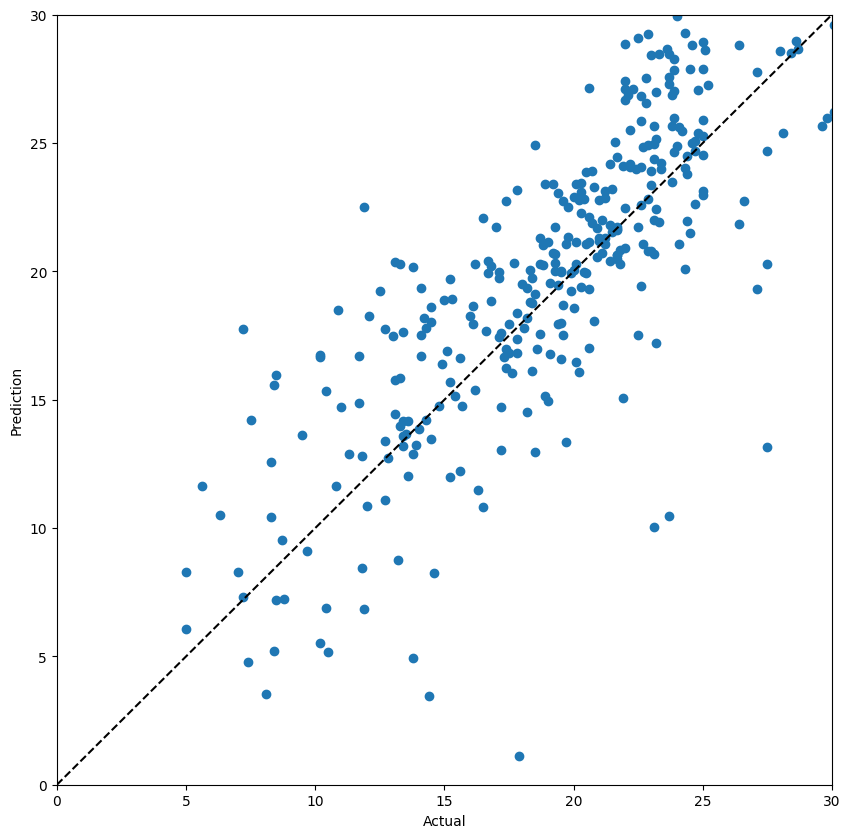

In [32]:
# Plot hasil
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))

ax.scatter(summary_train_pred["actual"], summary_train_pred["prediction"])
ax.plot([0,30], [0,30], "--k")

ax.set_xlabel("Actual")
ax.set_ylabel("Prediction")
ax.set_xlim(0, 30)
ax.set_ylim(0, 30)
plt.show()
           

In [33]:
# Cari nilai MSE
prediction_train_mse = mean_squared_error(y_pred, y_train)
print(prediction_train_mse)

20.677107947815138


In [34]:
# Cari perbandingan dengan baseline
comparison_mse = 100*(baseline_mse - prediction_train_mse) / baseline_mse
print(f"MSE turun {comparison_mse:.2f} %")

MSE turun 75.59 %


**Pada Data Test**

In [35]:
# Buat prediksi
y_test_pred = lr.predict(X_test_clean)

In [36]:
summary_test_pred = pd.DataFrame({"actual": y_test,
                                  "prediction": y_test_pred})

summary_test_pred.head()

,actual,prediction
410,15.0,16.003300
85,26.6,27.794474
280,45.4,39.267695
422,20.8,18.326136
199,34.9,30.454875


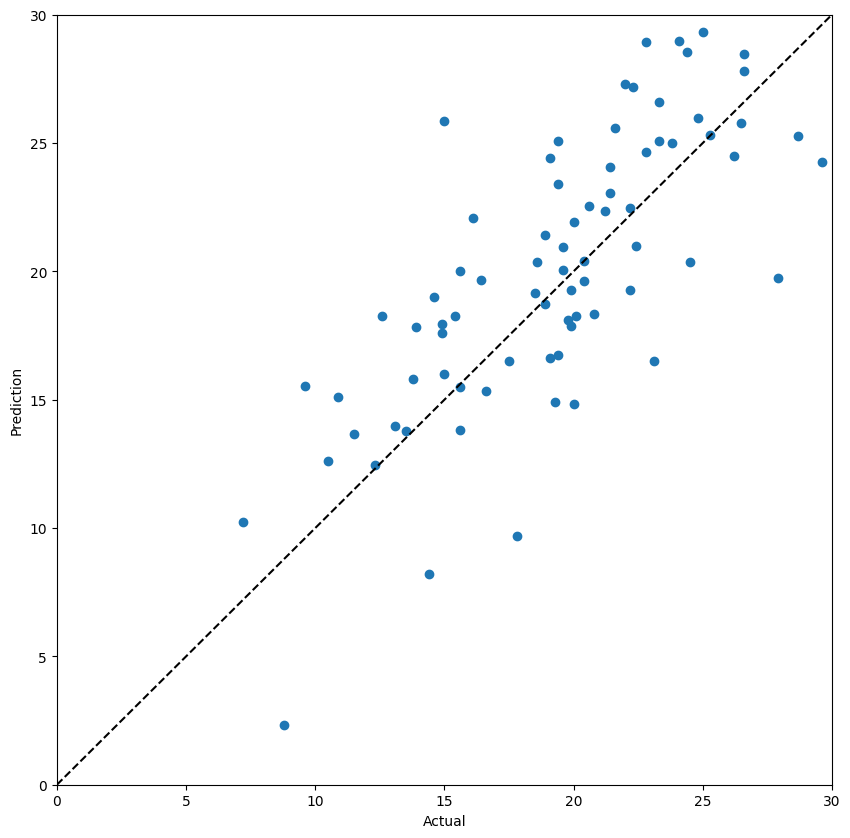

In [37]:
# Plot hasil
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

ax.scatter(summary_test_pred["actual"], summary_test_pred["prediction"])
ax.plot([0, 30], [0, 30], "--k")

ax.set_xlabel("Actual")
ax.set_ylabel("Prediction")
ax.set_xlim(0, 30)
ax.set_ylim(0, 30)
plt.show()

In [38]:
# Cari MSE
prediction_test_mse = mean_squared_error(y_test_pred, y_test)
print(prediction_test_mse)

28.192485758469555


In [39]:
# Cari perbandingan dengan baseline
comparison_mse = 100*(baseline_mse - prediction_test_mse) / baseline_mse
print(f"MSE turun {comparison_mse:.2f} %")

MSE turun 66.72 %


**Tampilkan hasil linear regression**

In [40]:
# Koefisien/slope linear regression
lr.coef_

array([-0.86714298,  1.08993461,  0.46469529,  0.29416564, -1.79829155,
        3.04106809, -0.02743154, -2.9168645 ,  2.46130402, -2.14627901,
       -1.96056812,  0.66159852, -3.87118358])

In [41]:
# Intercept linear regression
lr.intercept_

22.374752475247533

In [42]:
# Ekstrak model parameter
coef_ = lr.coef_
intercept_ = lr.intercept_
lr_params = np.append(coef_, intercept_)

lr_params_df = pd.DataFrame(lr_params,
                            index = list(X_train.columns) + ["constant"],
                            columns = ["coefficient"])
lr_params_df

,coefficient
CRIM,-0.867143
ZN,1.089935
INDUS,0.464695
CHAS,0.294166
NOX,-1.798292
RM,3.041068
AGE,-0.027432
DIS,-2.916865
RAD,2.461304
TAX,-2.146279


---
# **Melakukan Best Selection**

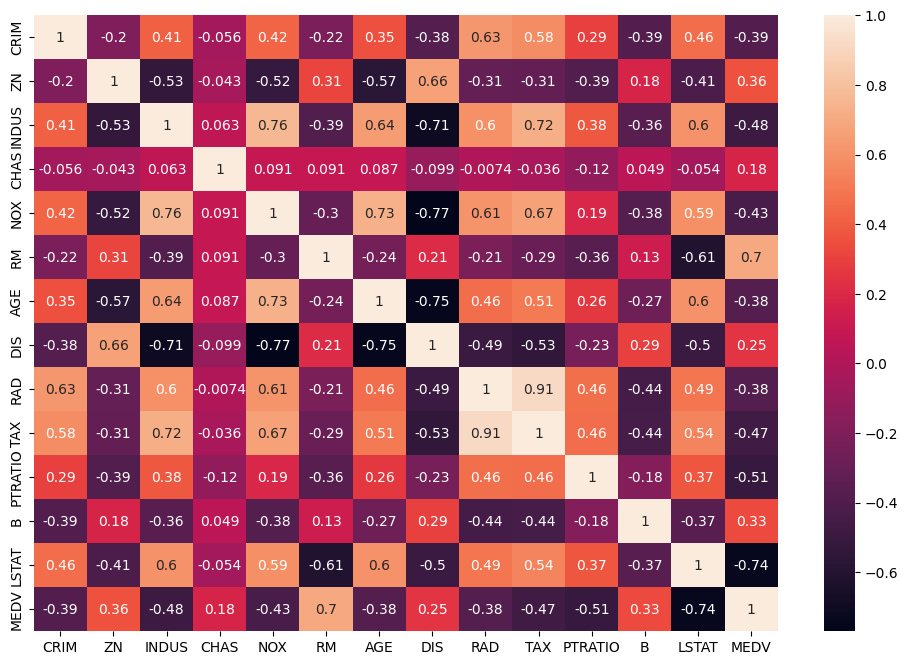

In [43]:
# Korelasi antar variabel

corr = df.corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, annot=True)

plt.show()

In [44]:
from itertools import combinations

In [45]:
column_list = list(X_train.columns)
n_column = len(column_list)

column_list

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [46]:
train_column_list = []

for i in range(n_column):
    list_of_combination = combinations(column_list, i)
    for combi in list_of_combination:
        train_column_list.append(list(combi))

# tambahkan seluruh kolom
train_column_list.append(column_list)

In [47]:
len(train_column_list)

8192

In [48]:
#train_column_list

In [49]:
idx = 95
train_list_idx = train_column_list[idx]
train_list_idx

['CRIM', 'ZN', 'RM']

In [50]:
# Filter Data
X_train_idx = X_train_clean[train_list_idx]
X_train_idx.head()

,CRIM,ZN,RM
203,-0.401149,3.653859,2.231987
441,0.702723,-0.486534,0.176596
172,-0.389296,-0.486534,-1.008059
95,-0.391244,-0.486534,0.487675
54,-0.403599,2.782197,-0.559197


In [51]:
X_test_idx = X_test_clean[train_list_idx]
X_test_idx.head()

,CRIM,ZN,RM
410,5.420728,-0.486534,-0.745275
85,-0.398615,-0.486534,0.494777
280,-0.401072,0.385128,2.185112
422,0.967497,-0.486534,-0.900104
199,-0.401560,3.653859,0.984832


In [52]:
def fit_model(X_train, y_train,
              X_test, y_test):
    # 1. Buat objek
    lr = LinearRegression()

    # 2. Lakukan cross-val
    scores = cross_val_score(estimator = lr,
                             X = X_train,
                             y = y_train,
                             cv = 5,
                             scoring = "neg_mean_squared_error")
    
    cv_score = - np.mean(scores)
    
    # 3. Fit model
    lr.fit(X = X_train,
           y = y_train)
    
    # 4. Cari train score
    y_train_pred = lr.predict(X_train)
    train_score = mean_squared_error(y_train, y_train_pred)
    
    # 4. Cari test score
    y_test_pred = lr.predict(X_test)
    test_score = mean_squared_error(y_test, y_test_pred)

    # 5. Ekstrak coefficient
    coef_ = lr.coef_
    intercept_ = lr.intercept_
    lr_params = np.append(coef_, intercept_)

    lr_params_df = pd.DataFrame(lr_params,
                                index = list(X_train.columns) + ["constant"],
                                columns = ["coefficient"])
    
    return lr, train_score, cv_score, test_score, lr_params_df


In [103]:
# Lakukan modeling
_, train_idx, cv_idx, test_idx, _ = fit_model(X_train = X_train_idx,
                                              y_train = y_train,
                                              X_test = X_test_idx,
                                              y_test = y_test)

print(f"train score: {train_idx:.3f}, cv score: {cv_idx:.3f}, test_score: {test_idx:.3f}")

train score: 20.677, cv score: 22.588, test_score: 28.192


Ambil kombinasi lain

In [104]:
idx = 520
train_list_idx = train_column_list[idx]
train_list_idx

['CRIM', 'NOX', 'RM', 'LSTAT']

In [105]:
# Filter Data
X_train_idx = X_train_clean[train_list_idx]
X_train_idx.head()

,CRIM,NOX,RM,LSTAT
203,-0.401149,-1.199016,2.231987,-1.266398
441,0.702723,1.587329,0.176596,0.940407
172,-0.389296,-0.391243,-1.008059,0.261930
95,-0.391244,-0.950404,0.487675,-0.867459
54,-0.403599,-1.251491,-0.559197,0.277382


In [106]:
X_test_idx = X_test_clean[train_list_idx]
X_test_idx.head()

,CRIM,NOX,RM,LSTAT
410,5.420728,0.357173,-0.745275,-0.381428
85,-0.398615,-0.915994,0.494777,-0.884316
280,-0.401072,-0.968469,2.185112,-1.273421
422,0.967497,0.503416,-0.900104,0.179052
199,-0.401560,-1.311708,0.984832,-1.161044


In [107]:
# Lakukan modeling
_, train_idx, cv_idx, test_idx, _ = fit_model(X_train = X_train_idx,
                                              y_train = y_train,
                                              X_test = X_test_idx,
                                              y_test = y_test)

print(f"train score: {train_idx:.3f}, cv score: {cv_idx:.3f}, test_score: {test_idx:.3f}")

train score: 27.322, cv score: 28.143, test_score: 40.732


Cari semua cv score & test score

In [109]:
train_score = []
cv_score = []
test_score = []

for idx in range(len(train_column_list)):
    if idx != 0:
        # Filter data
        train_list_idx = train_column_list[idx]
        X_train_idx = X_train_clean[train_list_idx]
        X_test_idx = X_test_clean[train_list_idx]

        # Buat model
        _, train_idx, cv_idx, test_idx, _ = fit_model(X_train = X_train_idx,
                                                      y_train = y_train,
                                                      X_test = X_test_idx,
                                                      y_test = y_test)

        # Simpan hasil
        train_score.append(train_idx)
        cv_score.append(cv_idx)
        test_score.append(test_idx)

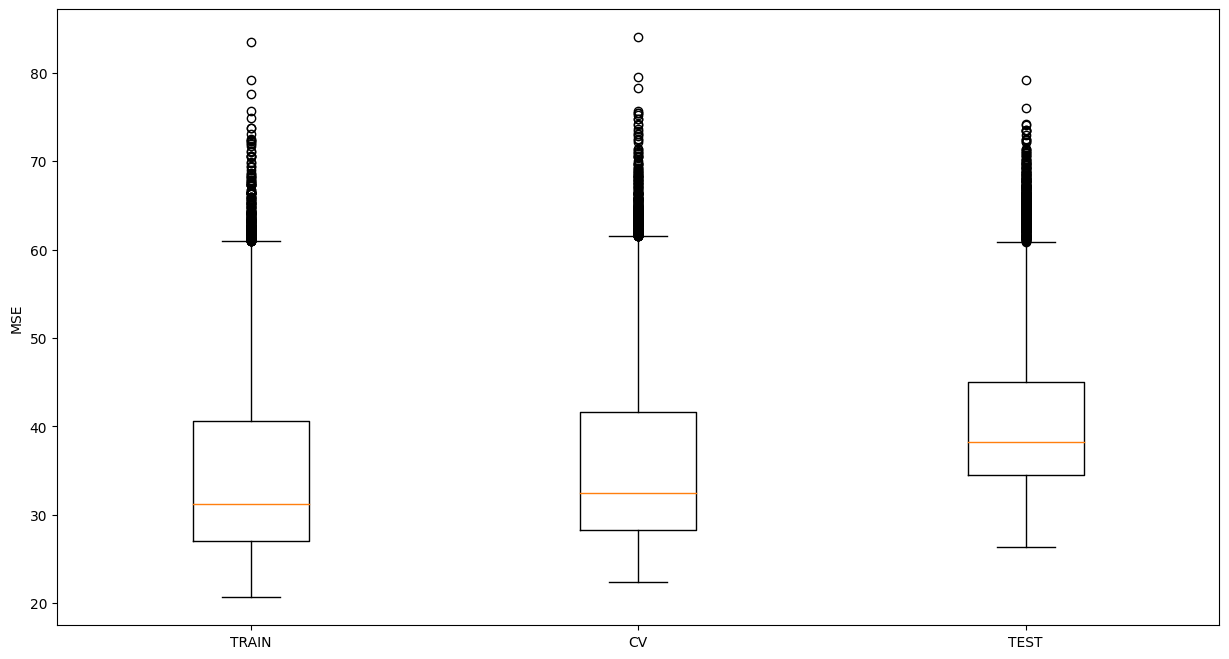

In [110]:
# Plot hasil
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

ax.boxplot([train_score, cv_score, test_score])

ax.set_xticklabels(["TRAIN", "CV", "TEST"])
ax.set_ylabel("MSE")
plt.show()

In [111]:
# Cari best test
best_idx = np.argmin(cv_score)
best_idx

7975

In [112]:
# Best features
train_column_list[best_idx + 1]

['CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [113]:
# Find model
lr_best, train_best_score, cv_best_score, \
        test_best_score, lr_params_best = fit_model(X_train = X_train_clean[train_column_list[best_idx+1]],
                                                    y_train = y_train,
                                                    X_test = X_test_clean[train_column_list[best_idx+1]],
                                                    y_test = y_test)

In [114]:
lr_params_best

,coefficient
CRIM,-0.902783
ZN,1.067176
NOX,-1.614884
RM,3.031962
DIS,-3.015255
RAD,2.352166
TAX,-1.923071
PTRATIO,-1.941225
B,0.681425
LSTAT,-3.838987


---
# **Melakukan Regularisasi Ridge**

In [64]:
# Import Ridge
from sklearn.linear_model import Ridge

In [65]:
# Gabungkan semuanya dalam 1 fungsi
def ridge_model(X_train, y_train,
                X_test, y_test,
                alpha):
    # Buat objek
    estimator = Ridge(alpha = alpha)

    # Lakukan fitting
    estimator.fit(X = X_train,
                  y = y_train)
    
    # Buat prediksi di data train
    y_pred_train = estimator.predict(X_train)
    train_score = mean_squared_error(y_train, y_pred_train)

    # Lakukan cross validation
    scores = cross_val_score(estimator = estimator,
                             X = X_train,
                             y = y_train,
                             cv = 5,
                             scoring = "neg_mean_squared_error")
    cv_score = -np.mean(scores)

    # Test score
    y_pred_test = estimator.predict(X_test)
    test_score = mean_squared_error(y_test, y_pred_test)

    # Tampilkan parameter
    coef_ = estimator.coef_
    intercept_ = estimator.intercept_
    params = np.append(coef_, intercept_)

    params_df = pd.DataFrame(params,
                             index = list(X_train.columns) + ["constant"],
                             columns = ["coefficient"])

    mse_score = [train_score, cv_score, test_score]

    return estimator, mse_score, params_df

In [66]:
alpha = 1.0
_, mse_score, ridge_param_1 = ridge_model(X_train = X_train_clean,
                                          y_train = y_train,
                                          X_test = X_test_clean,
                                          y_test = y_test,
                                          alpha = alpha)

train_score, cv_score, test_score = mse_score

print(f"Train: {train_score:.2f}, CV: {cv_score:.2f}, Test: {test_score:.2f}")
ridge_param_1

Train: 20.68, CV: 22.56, Test: 28.20


,coefficient
CRIM,-0.859440
ZN,1.073423
INDUS,0.432872
CHAS,0.297796
NOX,-1.766746
RM,3.049253
AGE,-0.034727
DIS,-2.887747
RAD,2.383086
TAX,-2.070922


In [67]:
alpha = 10.5
_, mse_score, ridge_param_2 = ridge_model(X_train = X_train_clean,
                                          y_train = y_train,
                                          X_test = X_test_clean,
                                          y_test = y_test,
                                          alpha = alpha)

train_score, cv_score, test_score = mse_score

print(f"Train: {train_score:.2f}, CV: {cv_score:.2f}, Test: {test_score:.2f}")
ridge_param_2

Train: 20.78, CV: 22.47, Test: 28.30


,coefficient
CRIM,-0.803076
ZN,0.946803
INDUS,0.211359
CHAS,0.322932
NOX,-1.518938
RM,3.102268
AGE,-0.085821
DIS,-2.636972
RAD,1.835412
TAX,-1.563911


In [68]:
alphas = [0.5, 1.0, 2.5, 5.0, 7.5, 10.0, 
          12.5, 15.0, 17.5, 30.0, 50.0]

mse_list = []
model_list = []

for alpha in alphas:
    _, mse_i, model_i = ridge_model(X_train = X_train_clean,
                                    y_train = y_train,
                                    X_test = X_test_clean,
                                    y_test = y_test,
                                    alpha = alpha)
    
    mse_list.append(mse_i)
    model_list.append(model_i)

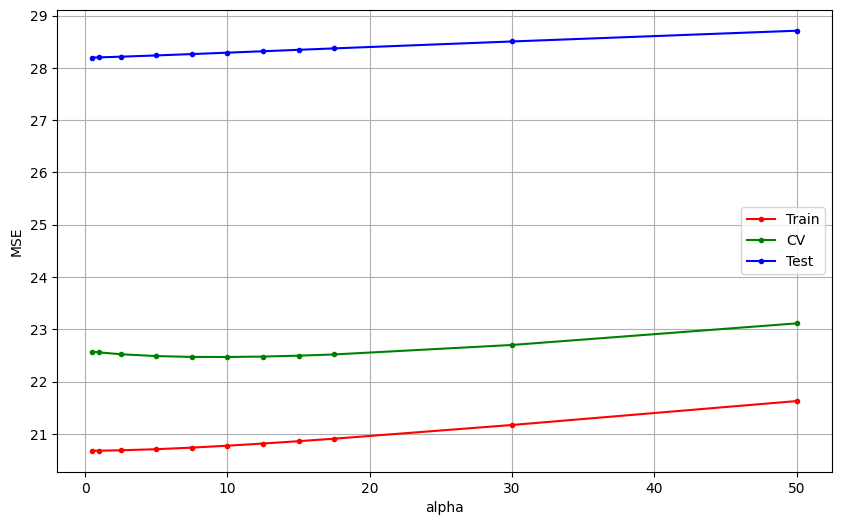

In [69]:
# Plot error
mse_list = np.array(mse_list)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

ax.plot(alphas, mse_list[:, 0], c="r", marker=".", label="Train")
ax.plot(alphas, mse_list[:, 1], c="g", marker=".", label="CV")
ax.plot(alphas, mse_list[:, 2], c="b", marker=".", label="Test")

ax.set_xlabel("alpha")
ax.set_ylabel("MSE")

plt.grid()
plt.legend()
plt.show()

In [70]:
# Best parameter adalah saat MSE di CV paling kecil
best_idx = np.argmin(mse_list[:, 1])
best_alpha = alphas[best_idx]
best_alpha

10.0

In [71]:
# Buat objek baru
#best_ridge = Ridge(alpha = cv_ridge.best_params_["alpha"])

In [72]:
# Best model
best_param_ridge = model_list[best_idx]
best_param_ridge

,coefficient
CRIM,-0.805466
ZN,0.952382
INDUS,0.220337
CHAS,0.321915
NOX,-1.530054
RM,3.100364
AGE,-0.083750
DIS,-2.649071
RAD,1.857735
TAX,-1.583734


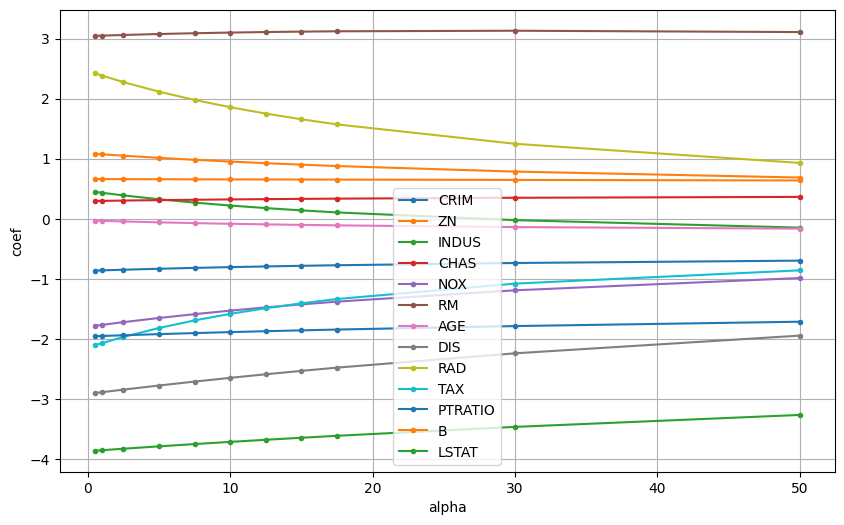

In [73]:
# Buat summary plot
models = pd.concat(model_list, axis=1)
models.columns = alphas

# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

for col in X_train.columns:
    ax.plot(alphas, models.loc[col], label=col, marker=".")

ax.set_xlabel("alpha")
ax.set_ylabel("coef")
plt.legend()
plt.grid()
plt.show()

---
# **Melakukan Regularisasi Lasso**

In [74]:
# Import Ridge
from sklearn.linear_model import Lasso

In [75]:
# Gabungkan semuanya dalam 1 fungsi
def lasso_model(X_train, y_train,
                X_test, y_test,
                alpha):
    # Buat objek
    estimator = Lasso(alpha = alpha)

    # Lakukan fitting
    estimator.fit(X = X_train,
                  y = y_train)
    
    # Buat prediksi di data train
    y_pred_train = estimator.predict(X_train)
    train_score = mean_squared_error(y_train, y_pred_train)

    # Lakukan cross validation
    scores = cross_val_score(estimator = estimator,
                             X = X_train,
                             y = y_train,
                             cv = 5,
                             scoring = "neg_mean_squared_error")
    cv_score = -np.mean(scores)

    # Test score
    y_pred_test = estimator.predict(X_test)
    test_score = mean_squared_error(y_test, y_pred_test)

    # Tampilkan parameter
    coef_ = estimator.coef_
    intercept_ = estimator.intercept_
    params = np.append(coef_, intercept_)

    params_df = pd.DataFrame(params,
                             index = list(X_train.columns) + ["constant"],
                             columns = ["coefficient"])

    mse_score = [train_score, cv_score, test_score]

    return estimator, mse_score, params_df

In [76]:
alpha = 0.1
_, mse_score, lasso_param_1 = lasso_model(X_train = X_train_clean,
                                          y_train = y_train,
                                          X_test = X_test_clean,
                                          y_test = y_test,
                                          alpha = alpha)

train_score, cv_score, test_score = mse_score

print(f"Train: {train_score:.2f}, CV: {cv_score:.2f}, Test: {test_score:.2f}")
lasso_param_1

Train: 21.15, CV: 22.99, Test: 29.51


,coefficient
CRIM,-0.592682
ZN,0.731610
INDUS,-0.000000
CHAS,0.265684
NOX,-1.218443
RM,3.161202
AGE,-0.000000
DIS,-2.307393
RAD,0.997600
TAX,-0.852036


In [77]:
alpha = 0.01
_, mse_score, lasso_param_2 = lasso_model(X_train = X_train_clean,
                                          y_train = y_train,
                                          X_test = X_test_clean,
                                          y_test = y_test,
                                          alpha = alpha)

train_score, cv_score, test_score = mse_score

print(f"Train: {train_score:.2f}, CV: {cv_score:.2f}, Test: {test_score:.2f}")
lasso_param_2

Train: 20.68, CV: 22.57, Test: 28.26


,coefficient
CRIM,-0.840634
ZN,1.052396
INDUS,0.373498
CHAS,0.292292
NOX,-1.732325
RM,3.048545
AGE,-0.009653
DIS,-2.859797
RAD,2.298111
TAX,-1.987894


In [78]:
alphas = [0.05, 0.10, 0.15, 0.20, 0.25, 1.00, 
          1.25, 1.50, 1.75, 3.00, 5.00]

mse_list = []
model_list = []

for alpha in alphas:
    _, mse_i, model_i = lasso_model(X_train = X_train_clean,
                                    y_train = y_train,
                                    X_test = X_test_clean,
                                    y_test = y_test,
                                    alpha = alpha)
    
    mse_list.append(mse_i)
    model_list.append(model_i)

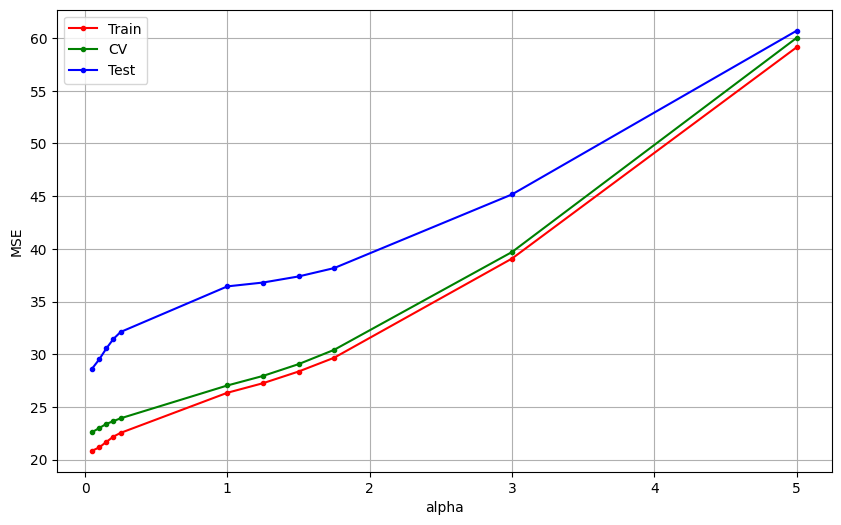

In [79]:
# Plot error
mse_list = np.array(mse_list)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

ax.plot(alphas, mse_list[:, 0], c="r", marker=".", label="Train")
ax.plot(alphas, mse_list[:, 1], c="g", marker=".", label="CV")
ax.plot(alphas, mse_list[:, 2], c="b", marker=".", label="Test")

ax.set_xlabel("alpha")
ax.set_ylabel("MSE")

plt.grid()
plt.legend()
plt.show()

In [80]:

# Best parameter adalah saat MSE di CV paling kecil
best_idx = np.argmin(mse_list[:, 1])
best_alpha = alphas[best_idx]
best_alpha

0.05

In [81]:
# Best model
best_param_lasso = model_list[best_idx]
best_param_lasso

,coefficient
CRIM,-0.736801
ZN,0.896865
INDUS,0.009804
CHAS,0.286313
NOX,-1.452161
RM,3.087952
AGE,-0.000000
DIS,-2.653206
RAD,1.644120
TAX,-1.353454


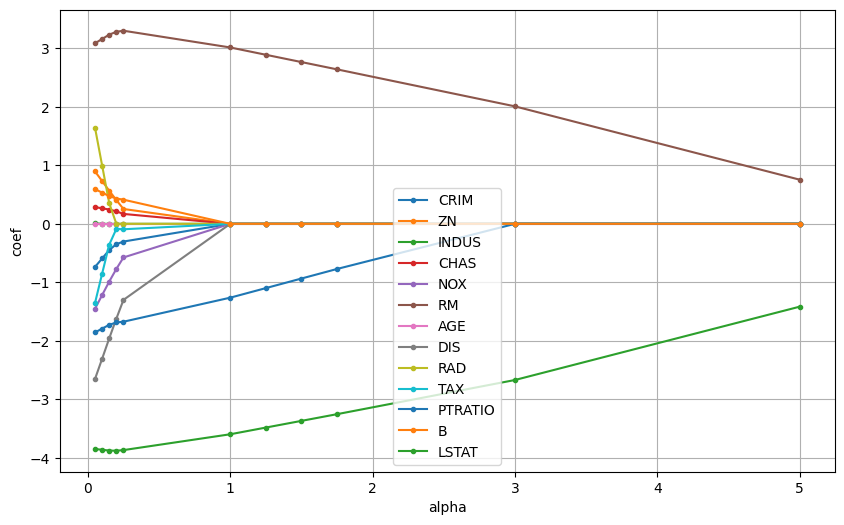

In [82]:
# Buat summary plot
models = pd.concat(model_list, axis=1)
models.columns = alphas

# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

for col in X_train.columns:
    ax.plot(alphas, models.loc[col], label=col, marker=".")

ax.set_xlabel("alpha")
ax.set_ylabel("coef")
plt.legend()
plt.grid()
plt.show()

---
# **Comparison**

In [116]:
best_params = pd.concat([lr_params_df,
                         best_param_ridge,
                         best_param_lasso],
                        axis = 1)
best_params.columns = ["OLS", "Ridge", "Lasso"]
best_params

,OLS,Ridge,Lasso
CRIM,-0.867143,-0.805466,-0.736801
ZN,1.089935,0.952382,0.896865
INDUS,0.464695,0.220337,0.009804
CHAS,0.294166,0.321915,0.286313
NOX,-1.798292,-1.530054,-1.452161
RM,3.041068,3.100364,3.087952
AGE,-0.027432,-0.083750,-0.000000
DIS,-2.916865,-2.649071,-2.653206
RAD,2.461304,1.857735,1.644120
TAX,-2.146279,-1.583734,-1.353454


In [117]:
# Import grid search
from sklearn.model_selection import GridSearchCV

In [118]:
# Buat model & parameter model yang ingin divariasikan
ridge = Ridge()

param_space = {"alpha": alphas}
param_space

{'alpha': [0.05, 0.1, 0.15, 0.2, 0.25, 1.0, 1.25, 1.5, 1.75, 3.0, 5.0]}

In [119]:
# Lakukan grid search dengan CV
cv_ridge = GridSearchCV(estimator = ridge,
                        param_grid = param_space,
                        scoring = "neg_mean_squared_error",
                        cv = 5)

# Fit searching
cv_ridge.fit(X = X_train_clean,
             y = y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.05, 0.1, 0.15, 0.2, 0.25, 1.0, 1.25, 1.5,
                                   1.75, 3.0, 5.0]},
             scoring='neg_mean_squared_error')

In [87]:
cv_ridge.best_params_

{'alpha': 0.1}

In [120]:
# Buat objek baru
best_ridge = Ridge(alpha = cv_ridge.best_params_["alpha"])

# Fit model
best_ridge.fit(X = X_train_clean,
               y = y_train)

Ridge(alpha=5.0)

In [121]:
# Buat model & parameter model yang ingin divariasikan
lasso = Lasso()

param_space = {"alpha": alphas}
param_space

{'alpha': [0.05, 0.1, 0.15, 0.2, 0.25, 1.0, 1.25, 1.5, 1.75, 3.0, 5.0]}

In [122]:
# Lakukan grid search dengan CV
cv_lasso = GridSearchCV(estimator = lasso,
                        param_grid = param_space,
                        scoring = "neg_mean_squared_error",
                        cv = 5)

# Fit searching
cv_lasso.fit(X = X_train_clean,
             y = y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.05, 0.1, 0.15, 0.2, 0.25, 1.0, 1.25, 1.5,
                                   1.75, 3.0, 5.0]},
             scoring='neg_mean_squared_error')

In [123]:
cv_lasso.best_params_

{'alpha': 0.05}

In [124]:
# Buat objek baru
best_lasso = Lasso(alpha = cv_lasso.best_params_["alpha"])

# Fit model
best_lasso.fit(X = X_train_clean,
               y = y_train)

Lasso(alpha=0.05)

In [125]:
# Cari score
def mse_model(estimator, X_test, y_test):
    # Predict
    y_pred = estimator.predict(X_test)

    # Cari mse
    mse = mean_squared_error(y_test, y_pred)

    return mse

In [126]:
print(mse_model(estimator = lr, X_test = X_test_clean, y_test = y_test))
print(mse_model(estimator = best_ridge, X_test = X_test_clean, y_test = y_test))
print(mse_model(estimator = best_lasso, X_test = X_test_clean, y_test = y_test))

28.192485758469555
28.236907847713066
28.63191889869513
